In [1]:
%load_ext autoreload
%autoreload 2

import sys
 
# setting path
sys.path.append('../read_data/')
sys.path.append('../')

In [24]:
from getData import read_data, label_dimensions_to_point_form, resize_images_and_labels

from bbox_utils import convert_to_box_form

In [25]:
import tensorflow as tf

In [26]:
box_coordinates = tf.concat([   boxes[:, :, :2] - boxes[:, :, 2:] / 2, 
                                    boxes[:, :, :2] + boxes[:, :, 2:] / 2 ], 
                                    axis = 2)

box_coordinates

<tf.Tensor: shape=(1, 1, 4), dtype=float32, numpy=array([[[25., 50., 75., 90.]]], dtype=float32)>

In [50]:
boxes = tf.constant([
    [50 / 300, 70 / 300, 50 / 300, 40 / 300]
], tf.float32)

boxes

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.16666667, 0.23333333, 0.16666667, 0.13333334]], dtype=float32)>

In [51]:
convert_to_box_form(boxes)

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.08333334, 0.16666666, 0.25      , 0.3       ]], dtype=float32)>

In [31]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

In [32]:
file_name = '06835_RV'
image_path = '/Users/usmanr/workspace/fisheye_images/rgb_images/'
label_path = '/Users/usmanr/workspace/fisheye_images/box_2d_annotations'

In [33]:
image, label = read_data(file_name, image_path, label_path)

image, label = resize_images_and_labels(image, label)

In [34]:
300 * 1100 / 1200

275.0

In [35]:
label

[]

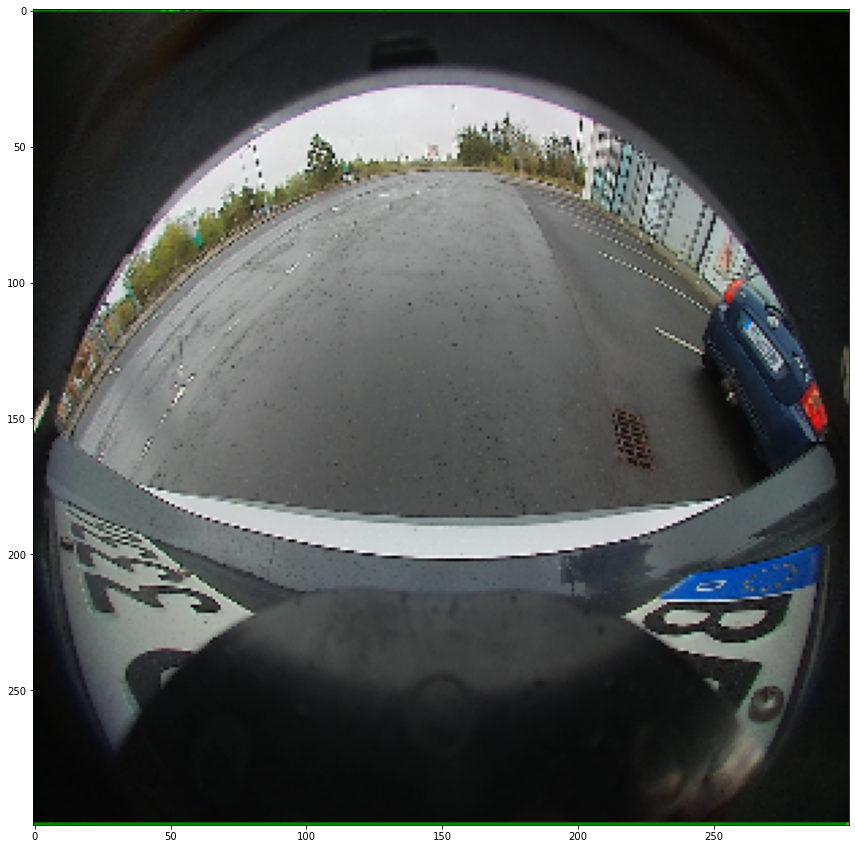

In [36]:
plt.figure(figsize=(15, 15))

for _, x_min, y_min, x_max, y_max in label:
    image = cv2.rectangle(image, (x_min, y_min),
                          (x_max, y_max), (0, 0, 255), 1)

plt.imshow(image)

In [37]:
label_dimensions_to_point_form(label)

[]

In [38]:
image.shape

(300, 300, 3)

In [39]:
from getData import read_data, label_dimensions_to_point_form
from bbox_utils import *
from dataGenerator import DataGenerator

In [40]:
import glob

In [41]:
file_names = glob.glob('/Users/usmanr/workspace/fisheye_images/rgb_images/*.png')

In [42]:
list_IDs = [f.split('/')[-1].replace('.png', '') for f in file_names]

In [46]:
feature_map_shapes = [38, 19, 10, 5, 3, 1]
aspect_ratios = [
    [1, 2, 0.5],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 0.5],
    [1, 2, 0.5]
]
number_of_feature_maps = 6

prior_boxes = generate_default_boxes(feature_map_shapes, number_of_feature_maps, aspect_ratios)
boxes = convert_to_box_form(prior_boxes)

In [47]:
# import numpy as np
# import keras

# from getData import read_data, label_dimensions_to_point_form
# from bbox_utils import match_priors_with_gt

# class DataGenerator(keras.utils.Sequence):
#     def __init__(self, list_IDs,
#                 label_folder_path,
#                 image_folder_path, 
#                 prior_boxes,
#                 prior_boxes_point_form,
#                 batch_size = 8, 
#                 n_classes = 11, 
#                 image_height = 300,
#                 image_width = 300,
#                 shuffle = True):
#         self.list_IDs = list_IDs
#         self.batch_size = batch_size
#         self.n_classes = n_classes
#         self.shuffle = shuffle
#         self.label_folder_path = label_folder_path
#         self.image_folder_path = image_folder_path
#         self.prior_boxes = prior_boxes
#         self.prior_boxes_point_form = prior_boxes_point_form
#         self.image_height = image_height
#         self.image_width = image_width
#         self.on_epoch_end()

#     def __len__(self):
#         return int( np.floor( len(self.list_IDs) / self.batch_size ) )

#     def __getitem__(self, index):
#         indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

#         list_IDs_temp = [self.list_IDs[k] for k in indexes]

#         X, y = self.__data_generation(list_IDs_temp)

#         return X, y

#     def on_epoch_end(self):
#         self.indexes = np.arange(len(self.list_IDs))

#         if self.shuffle:
#             np.random.shuffle(self.indexes)
        
#     def __data_generation(self, list_IDs_temp):

#         X = np.empty([self.batch_size, self.image_height, self.image_width, 3])
#         y_label = None
#         y_loc = None

#         for i, file_name in enumerate(list_IDs_temp):
#             image, labels = read_data(  file_name, 
#                                         self.image_folder_path, 
#                                         self.label_folder_path
#                                      )
            
#             image, labels = resize_images_and_labels(image, labels, self.image_height, self.image_width)

#             X[i,] = image

#             labels = label_dimensions_to_point_form(labels, self.image_height, self.image_width)

#             gt_labels = [l[0] for l in labels]
#             gt_boxes = [l[1:] for l in labels]
            
#             offset, one_hot_encoded_label = match_priors_with_gt(   
#                                                             self.prior_boxes, 
#                                                             self.prior_boxes_point_form, 
#                                                             tf.constant([gt_boxes]), 
#                                                             tf.constant([gt_labels]), 
#                                                             number_of_labels = self.n_classes, 
#                                                             threshold = 0.5)

#             if y_label == None:
#                 y_label = one_hot_encoded_label
#                 y_loc = offset
#             else:
#                 y_label = tf.concat([y_label, one_hot_encoded_label], axis = 1)
#                 y_loc = tf.concat([y_loc, offset], axis = 1)

#         return X, [y_loc, y_label]

In [48]:
dg = DataGenerator(list_IDs, 
                   label_path,
                   image_path, 
                   prior_boxes,
                   boxes)

In [49]:
for d in dg:
    holdout = d
    break

In [53]:
# holdout[1][0][:, :8732, :4]

In [54]:
i = 0
for gt in holdout[1][0][0, :8732, :4]:
    print(gt.numpy())
    break

[0. 0. 0. 0.]


In [56]:
def yoloFormattocv(x1, y1, x2, y2, H, W):
    bbox_width = x2 * W
    bbox_height = y2 * H
    center_x = x1 * W
    center_y = y1 * H

    voc = []

    voc.append(center_x - (bbox_width / 2))
    voc.append(center_y - (bbox_height / 2))
    voc.append(center_x + (bbox_width / 2))
    voc.append(center_y + (bbox_height / 2))

    return [int(v) for v in voc]

In [60]:
# 0.0022806525 0.010877192 3.7252903e-09 0.02666666

# gt.numpy()

prior_boxes[i, :].numpy()

array([0.8815789 , 0.35526314, 0.10954451, 0.10954451], dtype=float32)

0.058333334 0.8183333 0.07 0.103333354
0.058333334 0.8183333 0.07 0.103333354
0.060000002 0.74666667 0.04666667 0.0866667
0.060000002 0.74666667 0.04666667 0.0866667
0.058333334 0.8183333 0.07 0.103333354
0.28333333 0.09166667 0.07333332 0.06333333
0.28333333 0.09166667 0.07333332 0.06333333
0.28333333 0.09166667 0.07333332 0.06333333
0.38 0.043333333 0.13333333 0.086666666
0.38 0.043333333 0.13333333 0.086666666
0.38 0.043333333 0.13333333 0.086666666
0.38 0.043333333 0.13333333 0.086666666
0.38 0.043333333 0.13333333 0.086666666
0.38 0.043333333 0.13333333 0.086666666
0.38 0.043333333 0.13333333 0.086666666
0.69166666 0.061666667 0.116666675 0.09
0.69166666 0.061666667 0.116666675 0.09
0.69166666 0.061666667 0.116666675 0.09
0.69166666 0.061666667 0.116666675 0.09
0.87833333 0.24000001 0.056666672 0.06666668
0.87833333 0.24000001 0.056666672 0.06666668
0.87833333 0.24000001 0.056666672 0.06666668
0.87833333 0.24000001 0.056666672 0.06666668


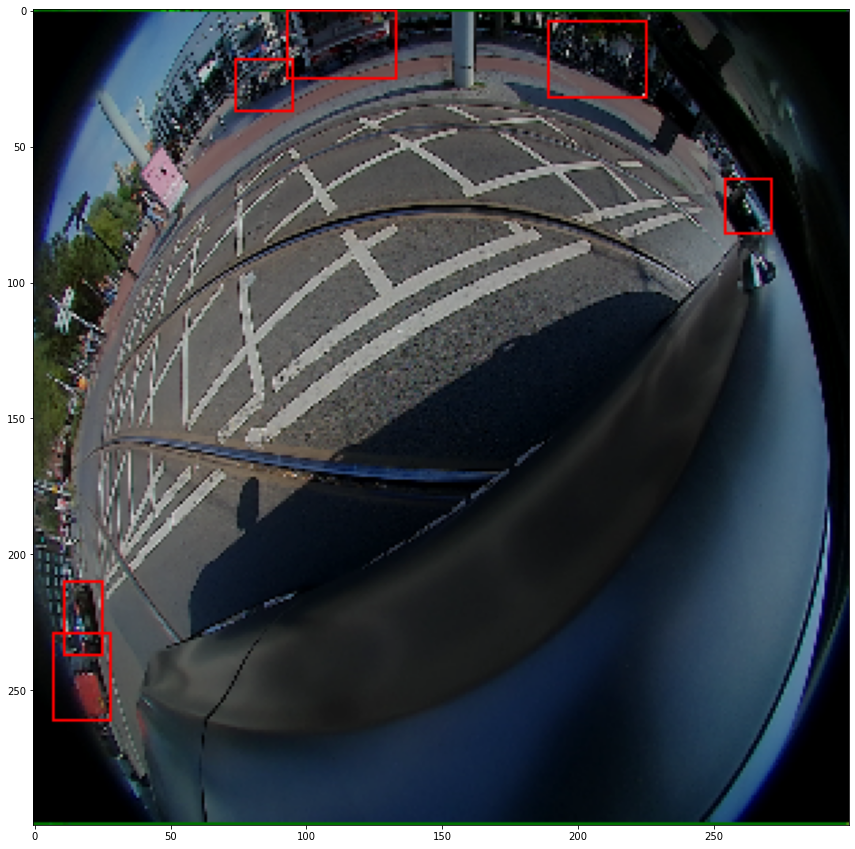

In [63]:
image_width = 300
image_height = 300

color = (255, 0, 0)

plt.figure(figsize=(15, 15))

image_number = 0

image = np.array(holdout[0][image_number] * 255, np.int32)

i = 0
for gt in holdout[1][0][image_number, :, :4]:
    c_x, c_y, width, height = gt.numpy()
    
    if c_x != 0 and c_y != 0:
        c_x, c_y, width, height = gt.numpy() + prior_boxes[i, :].numpy()
        print(c_x, c_y, width, height)
        start_x, start_y, end_x, end_y = yoloFormattocv(c_x, c_y, width, height, 300, 300)
        
#         print()
        
#         start_x, start_y, end_x, end_y = boxes[i, :].numpy()
    
#         start_x, start_y, end_x, end_y = int(start_x * image_width), int(start_y * image_height), int(end_x * image_width), int(end_y * image_height)

        image = cv2.rectangle(image, [start_x, start_y], [end_x, end_y], color, thickness = 1)
    i+=1

plt.imshow(image)

In [ ]:
start_x, start_y, end_x, end_y 

In [64]:
file_names = glob.glob('/Users/usmanr/workspace/fisheye_images/box_2d_annotations/*.txt')

In [71]:
labels = []
label_names = []

map_labels = {}

for file_name in file_names:
    f = open(file_name)
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(',')
        map_labels[line[0]] = line[1]
#         print(line)
#         break

In [72]:
map_labels

{'person': '1',
 'vehicles': '0',
 'bicycle': '2',
 'traffic_sign': '4',
 'traffic_light': '3'}

In [67]:
label_names

['person', 'vehicles', 'bicycle', 'traffic_sign', 'traffic_light']

In [68]:
len(label)

5